In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import pickle

# This script loads a CSV file containing WARP JSON data.
csv_file_path = "../data/warp-csv-dataset.csv"

try:
    with open(csv_file_path, 'rb') as csv_file:
        df_warp_json_data = pd.read_csv(csv_file)    
except Exception as e:
    raise

print("CSV file loaded successfully!")

CSV file loaded successfully!


dataframe details

In [78]:
# Setting Pandas options.
pd.set_option("display.max_rows", 50) # How to display all rows from data frame using pandas. Setting value to None to show all rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 100)
pd.set_option("display.max_info_rows", 1000000)
pd.set_option("display.precision", 2)
#pd.set_option("styler.format.precision", 2)

Descriptive Analysis

In [79]:
# Show a sample of first 3 rows.
df_warp_json_data.head(3)

print(
    f"Number of columns in the original data: "
    f"{df_warp_json_data.shape[1]}"
    "\n"
)

df_orig_num    = df_warp_json_data.select_dtypes(include='number')
l_df_num_names = df_orig_num.columns.tolist()

print(f"\nNumber of numerical variables: {len(l_df_num_names)}")
print(l_df_num_names)


df_orig_cat    = df_warp_json_data.select_dtypes(include='object')
l_df_cat_names = list(df_orig_cat.columns)

print(f"\nNumber of categorical variables: {len(l_df_cat_names)}")
print(l_df_cat_names)


Number of columns in the original data: 36


Number of numerical variables: 34
['hour', 'day_of_week', 'month', 'day_of_year', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'yearday_sin', 'yearday_cos', 'is_dst', 'is_holiday', 'is_weekend', 'is_non_working_day', 'Load', 'Price', 'Flow_BE', 'Flow_DE', 'Flow_GB', 'Flow_DK', 'Flow_NO', 'Total_Flow', 'temperature_2m', 'wind_speed_10m', 'apparent_temperature', 'cloud_cover', 'snowfall', 'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation', 'Wind_Vol', 'WindOffshore_Vol', 'Solar_Vol', 'Nuclear_Vol']

Number of categorical variables: 2
['local_datetime', 'target_datetime']


Create frequency table for missing values

In [80]:
# Pandas Series with type of each variable (variable, column) in df_orig.
ps_missing_type    = df_warp_json_data.dtypes

# Number of missing data per variable.
ps_missing_total   = df_warp_json_data.isnull().sum()

# Percentage of missing per variable.
ps_missing_percent = round(100 * ps_missing_total / df_warp_json_data.shape[0], 1)

In [81]:
# Create table (Pandas DataFrame).
df_missing_data = pd.DataFrame({

    'data_type':   ps_missing_type,
    'empty_total': ps_missing_total,
    'empty_perc':  ps_missing_percent
})

# Sort table by number of missing data in descending order.
df_missing_data.sort_values(
    by        = 'empty_total',
    ascending = False,
    inplace   = True
)

# Remove variables that have no missing values.
df_missing_data = df_missing_data.query("empty_total > 0")

# Show table.
print(
    f"Number of variables having missing data: "
    f"{df_missing_data.shape[0]} (out of {df_warp_json_data.shape[1]})"
)

df_missing_data

Number of variables having missing data: 0 (out of 36)


,data_type,empty_total,empty_perc


              target_datetime     Price
313 2025-05-21 22:00:00+00:00  1.15e-01
314 2025-05-21 21:00:00+00:00  1.22e-01
315 2025-05-21 20:00:00+00:00  1.30e-01
316 2025-05-21 19:00:00+00:00  1.14e-01
317 2025-05-21 18:00:00+00:00  1.00e-01
318 2025-05-21 17:00:00+00:00  8.63e-02
319 2025-05-21 16:00:00+00:00  4.91e-02
325 2025-05-21 10:00:00+00:00  1.50e-04
326 2025-05-21 09:00:00+00:00  4.22e-02
327 2025-05-21 08:00:00+00:00  8.48e-02
(7392, 36)
(7392, 36)
   hour  day_of_week  month  day_of_year  hour_sin  hour_cos  weekday_sin  \
0    23            1      6          154     -0.26      0.97         0.78   
1    22            1      6          154     -0.50      0.87         0.78   
2    21            1      6          154     -0.71      0.71         0.78   

   weekday_cos  yearday_sin  yearday_cos             local_datetime  is_dst  \
0         0.62         0.47        -0.88  2025-06-04 01:00:00+02:00       1   
1         0.62         0.47        -0.88  2025-06-04 00:00:00+02:00    

/var/folders/gy/xs43v__d0mn25qy5kzxrnkrm0000gn/T/ipykernel_9705/3023296947.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data_nonempty, labels=months_with_data, patch_artist=True)


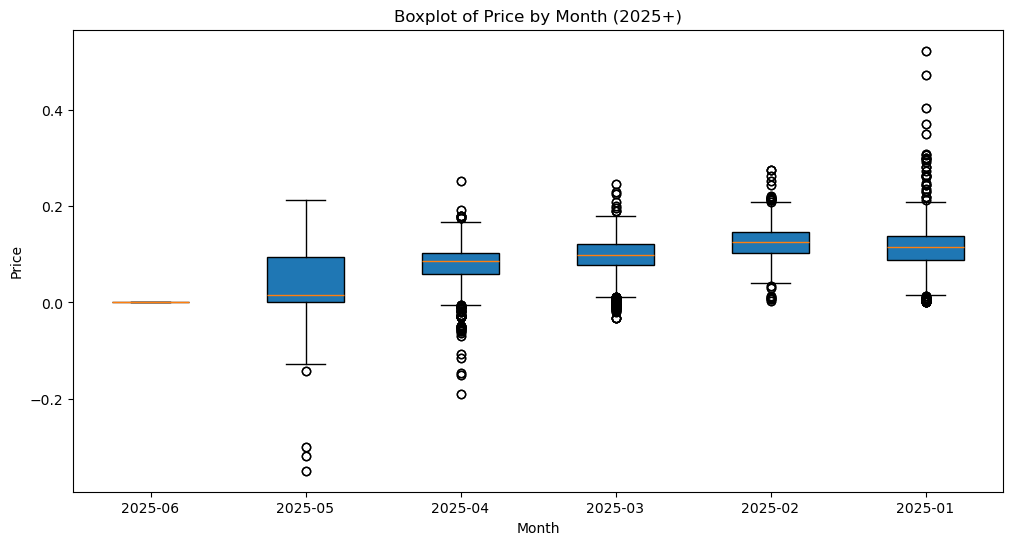

In [ ]:
# Ensure the date column is recognized as datetime
df_warp_json_data['target_datetime'] = pd.to_datetime(df_warp_json_data['target_datetime'])

# Show the first 10 rows in 2025 where Price > 0
print(df_warp_json_data.loc[
    (df_warp_json_data['target_datetime'] >= '2025-01-01') & (df_warp_json_data['Price'] > 0),
    ["target_datetime", "Price"]
].head(10))

print(df_warp_json_data.shape)

# Filter the data for the years 2025 (do NOT use .loc[] unless index is datetime)
df_filtered = df_warp_json_data[df_warp_json_data['target_datetime'] >= '2025-01-01'].copy()

print(df_filtered.shape)

# Display the first three records of df_filtered
print(df_filtered.head(3))

# Extract month and year for grouping
df_filtered["month"] = df_filtered["target_datetime"].dt.strftime("%Y-%m")  # Format: YYYY-MM

# Group data by month and only keep months with non-empty data
months_with_data = []
grouped_data_nonempty = []
for month in df_filtered["month"].unique():
    group = df_filtered.loc[df_filtered["month"] == month, "Price"].dropna()
    if len(group) > 0:
        months_with_data.append(month)
        grouped_data_nonempty.append(group)

print(f"Number of months with data: {len(months_with_data)}")
print(f"Number of groups: {len(grouped_data_nonempty)}")

# Ensure the lengths match before plotting
assert len(months_with_data) == len(grouped_data_nonempty), "Mismatch between months and groups!"

plt.figure(figsize=(12, 6))
plt.boxplot(grouped_data_nonempty, labels=months_with_data, patch_artist=True)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Boxplot of Price by Month (2025+)')
plt.show()

# 1. Boxplot of Price by Month (2025+)
#    - Shows the distribution of 'Price' for each month from Jan 2025 onwards.
#    - Each box represents the spread (min, Q1, median, Q3, max) of prices for a given month.
#    - Useful for visualizing monthly price variability and outliers.
#

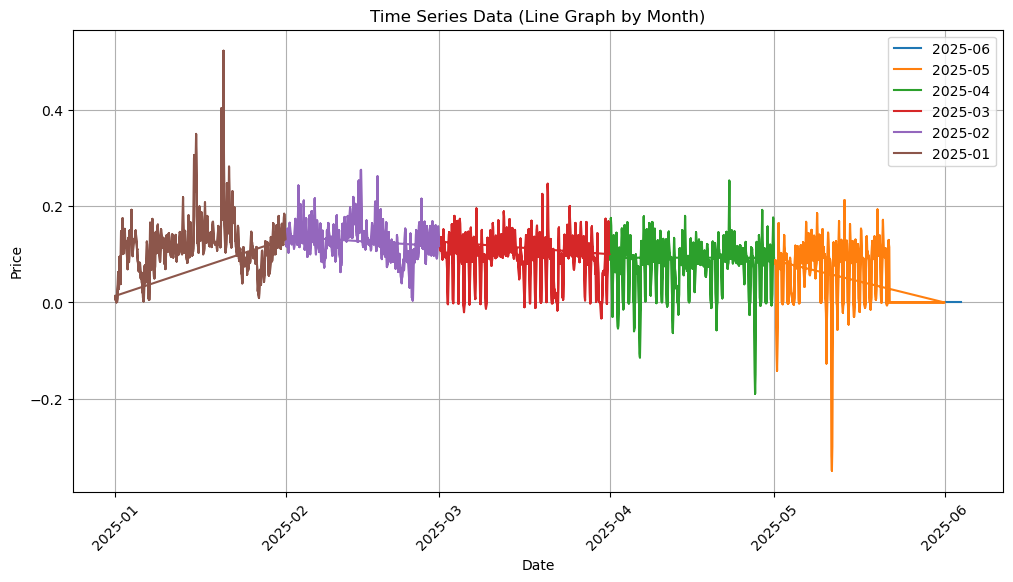

In [ ]:
# Plot line graph for each month

# Group data by month
grouped_data_linegraph = {month: df_filtered[df_filtered["month"] == month] for month in df_filtered["month"].unique()}

plt.figure(figsize=(12, 6))
for month, data in grouped_data_linegraph.items():
    plt.plot(data["target_datetime"], data["Price"], label=month)  # Line plot for each month

# Beautify plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Time Series Data (Line Graph by Month)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

# 2. Line Graph: Time Series Data (Line Graph by Month)
#    - Plots the time series of 'Price' for each month (2025+), with each line representing a different month.
#    - Helps observe trends, patterns, and fluctuations in prices over time within each month.
#

Conduct Descriptive and summary statictics

In [84]:
df_orig_num.describe()
df_orig_cat.describe()

,local_datetime,target_datetime
count,7392,7392
unique,3696,3696
top,2025-06-04 01:00:00+02:00,2025-06-03 23:00:00+00:00
freq,2,2


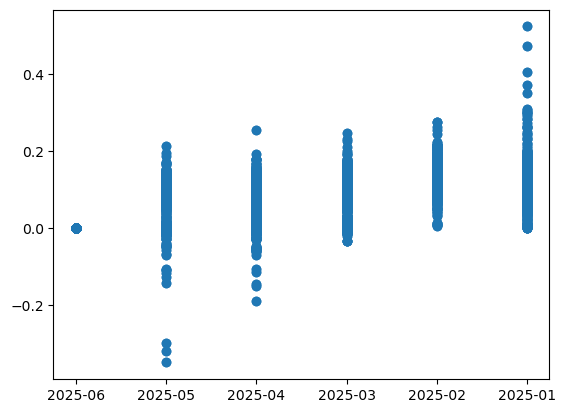

In [ ]:
plt.scatter(df_filtered['month'], df_filtered['Price'])
plt.show()


# 3. Scatter Plot: Price by Month
#    - Plots individual 'Price' values against their corresponding months.
#    - Provides a visual sense of price dispersion and density for each month.
#


In [ ]:
import numpy as np

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered['Price'], df_filtered['target_datetime'].astype('category').cat.codes)
print("Correlation coefficient matrix:")
print(r)


Correlation coefficient matrix:
[[ 1.         -0.50927531]
 [-0.50927531  1.        ]]


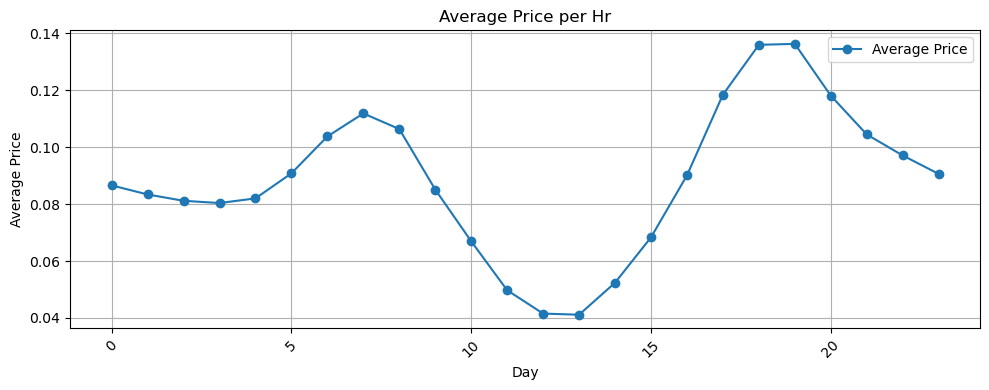

In [ ]:
# Ensure 'Hour' column exists by extracting it from 'target_datetime'
df_filtered['Hour'] = df_filtered['target_datetime'].dt.hour

# Drop rows with missing values in 'Price' column
df_filtered_price = df_filtered[['Hour', 'Price']].dropna()

# Calculate the average price per hour
average_price_per_hour = df_filtered_price.groupby('Hour')['Price'].mean()

# Plot the average price per hr
plt.figure(figsize=(10,4))
plt.plot(average_price_per_hour.index, average_price_per_hour, marker='o', linestyle='-', label='Average Price')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.title('Average Price per Hr')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Average Price per Hour
#    - Plots the average 'Price' for each hour of the day (0–23), aggregated over all days in the filtered data.
#    - Reveals intraday price patterns and highlights hours with higher or lower average prices.
#

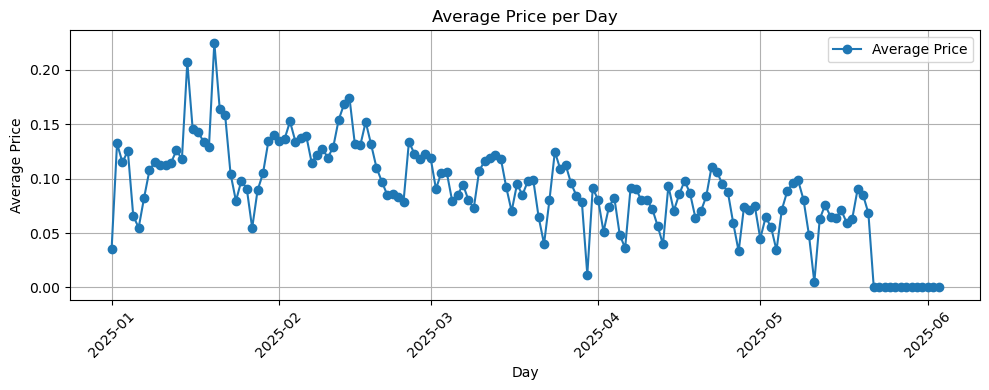

In [ ]:
# Extract the date from 'target_datetime'
df_filtered_price['Day'] = df_filtered.loc[df_filtered_price.index, 'target_datetime'].dt.date

# Calculate the average price per day
average_price_per_day = df_filtered_price.groupby('Day')['Price'].mean()

# Plot the average price per day
plt.figure(figsize=(10,4))
plt.plot(average_price_per_day.index, average_price_per_day, marker='o', linestyle='-', label='Average Price')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.title('Average Price per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 5. Average Price per Day
#    - Plots the average 'Price' for each day in the filtered dataset.
#    - Helps identify daily trends, spikes, or drops in prices over the selected period.